Welcome! Let's create a resume screening app using Natural Language Processing!

Understanding Our Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('ResumeDataset.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [4]:
df['Category'].value_counts() # number of resumes per category

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

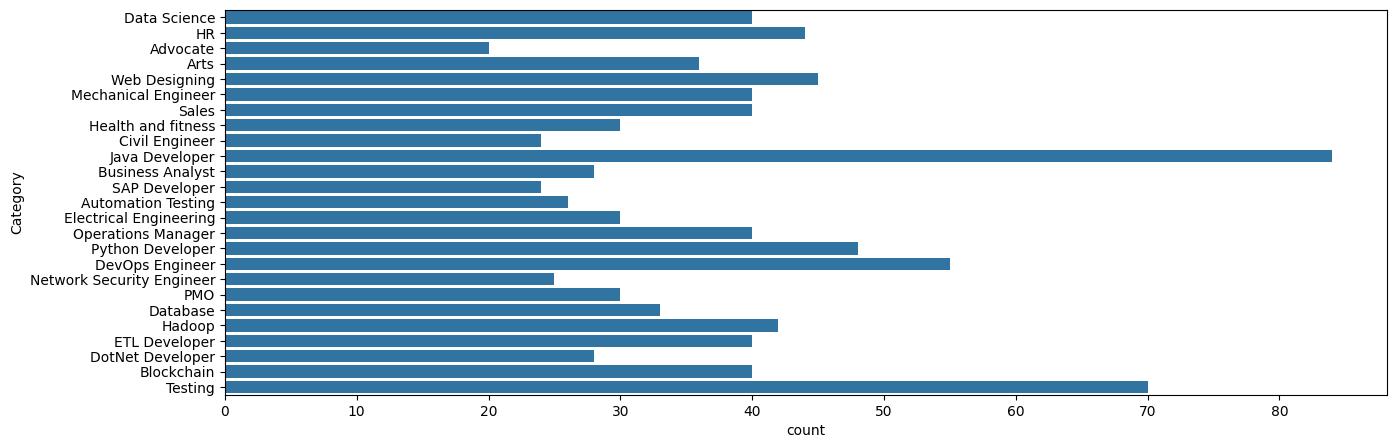

In [5]:
plt.figure(figsize= (15,5))
sns.countplot(df['Category'])
plt.show()

([<matplotlib.patches.Wedge at 0x1188a8440>,
 [Text(1.058871227218848, 0.29797940225467084, 'Data Science'),
  Text(0.7841417277955074, 0.7714413462667635, 'HR'),
  Text(0.41347312332933783, 1.0193331036929403, 'Advocate'),
  Text(0.053862303159734344, 1.0986805051052508, 'Arts'),
  Text(-0.27717597647551645, 1.0645062132579801, 'Web Designing'),
  Text(-0.5706079221763859, 0.9404289442321242, 'Mechanical Engineer'),
  Text(-0.8089120194310812, 0.7454269547178519, 'Sales'),
  Text(-0.9773197556910534, 0.5048228353947349, 'Health and fitness'),
  Text(-1.0745481947062527, 0.23525768266633296, 'Civil Engineer'),
  Text(-1.0988505276751686, -0.05027442518820011, 'Java Developer'),
  Text(-1.0485773817141402, -0.3323935537243749, 'Business Analyst'),
  Text(-0.9271404255154017, -0.5919549234317764, 'SAP Developer'),
  Text(-0.7427816407083776, -0.8113417493427606, 'Automation Testing'),
  Text(-0.5207133706140742, -0.9689466371600296, 'Electrical Engineering'),
  Text(-0.29105721628813813,

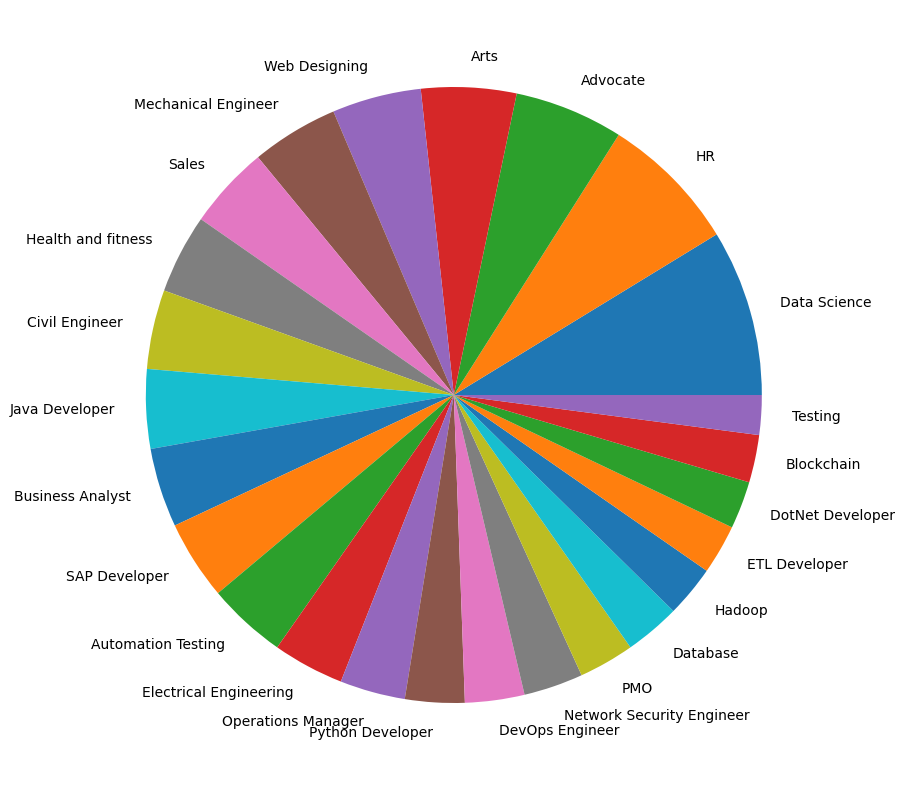

In [6]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize= (15,10))
plt.pie(counts,labels=labels)

Exploring The Resume

In [8]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data: URLs, hashtags, mentions, special letters, punctuation

In [36]:
import re
def cleanResume(txt):
    #Removes URLs like http://example.com (with a trailing space), emails, and hashtags
    cleanTxt = re.sub(r"http\S+\s", "", txt) 
    cleanTxt = re.sub(r"@\S+", "", cleanTxt)
    cleanTxt = re.sub(r"#\S+", "", cleanTxt)
    # Removes all occurrences of RT or cc
    cleanTxt = re.sub(r"RT|cc","", cleanTxt)
    # Remove special characters
    special_chars = re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")
    cleanText = re.sub(r"[%s]" % special_chars, ' ', cleanText)
    # Remove non-ASCII chars
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    # Remove multiple consecutive spaces
    cleanText = re.sub(r'\s+', ' ', cleanText)

    return cleanTxt


<>:10: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\]'
/var/folders/l3/bd70kwvd24j5kcpbm1ybtzy80000gn/T/ipykernel_2988/2413580636.py:10: SyntaxWarning: invalid escape sequence '\]'
  special_chars = re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")


In [30]:
cleanResume("my ### #shan&mathi site is http://helowrld and access it @gmail.com")

/var/folders/l3/bd70kwvd24j5kcpbm1ybtzy80000gn/T/ipykernel_2988/4156651575.py:10: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)


UnboundLocalError: cannot access local variable 'cleanText' where it is not associated with a value